# Data Augmentation

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torchvision.transforms as transforms
import torchvision 
from torch.utils.data import DataLoader
import pandas as pd 
import os 
from torch.utils.data import Dataset
from torchvision.utils import save_image
from skimage import io

In [ ]:
!unzip "archive.zip"

Archive:  archive.zip
  inflating: cats_dogs.csv           
  inflating: cats_dogs_resized/cat.0.jpg  
  inflating: cats_dogs_resized/cat.1.jpg  
  inflating: cats_dogs_resized/cat.2.jpg  
  inflating: cats_dogs_resized/cat.3.jpg  
  inflating: cats_dogs_resized/cat.4.jpg  
  inflating: cats_dogs_resized/cat.5.jpg  
  inflating: cats_dogs_resized/cat.6.jpg  
  inflating: cats_dogs_resized/cat.7.jpg  
  inflating: cats_dogs_resized/dog.0.jpg  
  inflating: cats_dogs_resized/dog.1.jpg  


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Load Data

In [ ]:
class CatsAndDogsDataset(Dataset):
  def __init__(self,csv_file,root_dir,transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  
  def __len__(self):
    return len(self.annotations)

  def __getitem__(self,index):
    img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0])
    image = io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index,1]))

    if self.transform:
      image = self.transform(image)
    return image
    

In [ ]:
my_transforms = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()])
dataset = CatsAndDogsDataset(csv_file = "cats_dogs.csv",root_dir = "cats_dogs_resized",transform=my_transforms)

In [ ]:
for i in dataset:
  print(i.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


# Data Augmentation Loop


In [ ]:
img_num = 0
for img in dataset:
  save_image(img,"img"+str(img_num)+".png")
  img_num+=1

# Albumentation Augmentation

In [8]:
!pip install --upgrade albumentations

     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 37.6MB 79kB/s 
     |████████████████████████████████| 952kB 56.1MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


1. Classification
2. Segmentation
3. Detection

In [1]:
import cv2
import albumentations as A 
import numpy as np 
from utils import plot_examples
from PIL import Image


In [5]:
image = Image.open("elon.jpeg")
mask = Image.open("mask.jpeg")
transform = A.Compose(
    [
     A.Resize(1920,1080),
     A.RandomCrop(1280,720),
     A.Rotate(limit= 40,p=0.9),
     A.HorizontalFlip(),
     A.VerticalFlip()
    ]
)

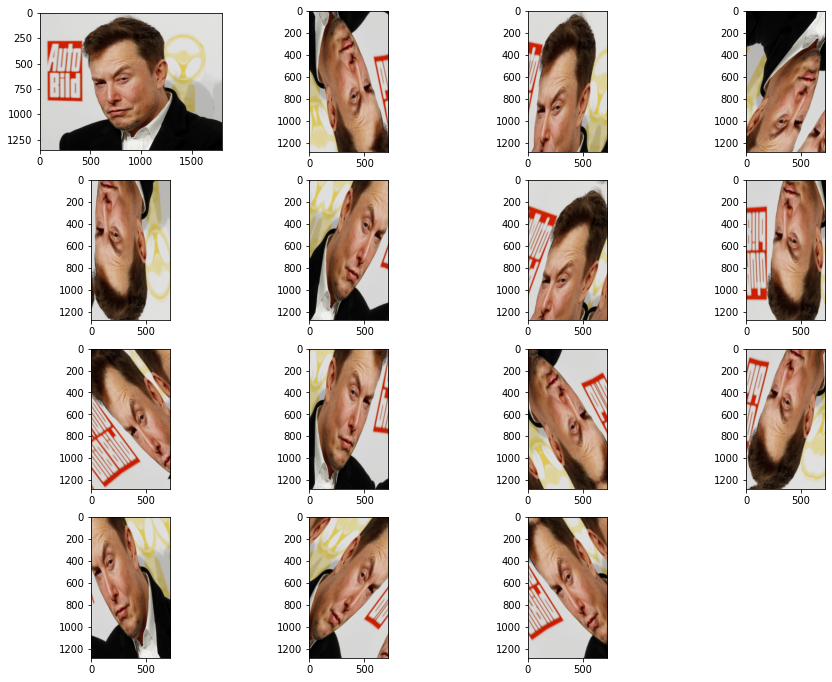

In [11]:
images_list = [image]
image = np.array(image)
for i in range(15):
  augmentations = transform(image=image)
  augmented_img = augmentations["image"]
  images_list.append(augmented_img)
plot_examples(images_list)

For segmentation purposes you can have mask and image both and can perform the augmentation in the similar manner. 


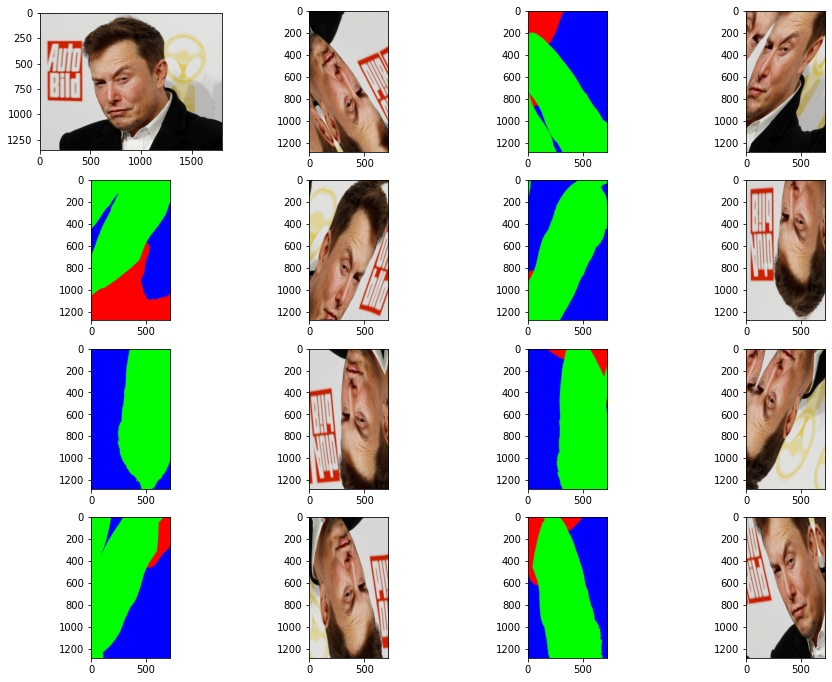

In [14]:
images_list = [image]
image = np.array(image)
mask = np.array(mask)
for i in range(8):
  augmentations = transform(image=image,mask = mask)
  augmented_img = augmentations["image"]
  augmented_mask = augmentations["mask"]
  images_list.append(augmented_img)
  images_list.append(augmented_mask)
plot_examples(images_list)

Detection Purpose 

In [5]:
# Pascal Voc 
# (X_min,Y_min,X_max,Y_max)
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
bboxes = [[13,170,224,410]]
transform = A.Compose(
    [
     A.Resize(1920,1080),
     A.RandomCrop(1280,720),
     A.Rotate(limit= 40,p=0.9),
     A.HorizontalFlip(),
     A.VerticalFlip(),
    ],bbox_params = A.BboxParams(format="pascal_voc",label_fields=[])
)


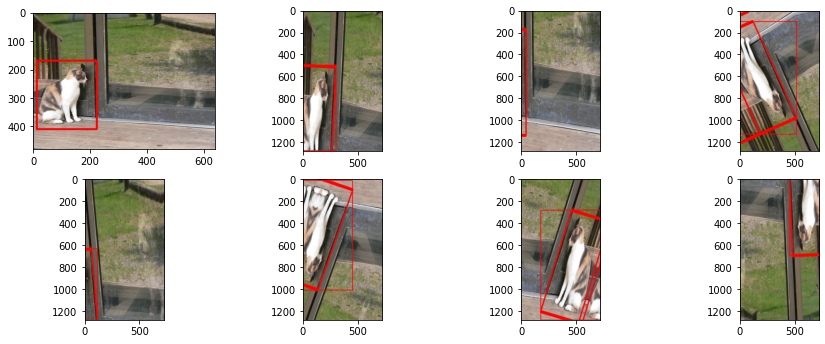

In [8]:
images_list = [image]
saved_bboxes = [bboxes[0]]
for i in range(8):
  augmentations = transform(image=image,bboxes=bboxes)
  augmented_img = augmentations["image"]
  images_list.append(augmented_img)
  saved_bboxes.append(augmentations["bboxes"][0])
plot_examples(images_list,saved_bboxes)